In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

import json

import pylattice

import pylattice.functions.InputProcessing as inproc
import pylattice.functions.TiffProcessing as tiffproc
import pylattice.classes.Track as Track



# input

In [4]:
path = '/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/'
inputParameters = pd.read_csv(path+'_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)

print(master_outputDataFolder)

inputParameters.style.set_properties(**{'text-align': 'left'})

5689.0
output_560


,key,value
0,inputDataFolder,./
1,outputDataFolder,./output
2,movieLength,10
3,detectionAmplitudeCutoff,7000
4,framerate_msec,5689
5,detectionFilename,Detection3D.mat
6,trackingFilename,trackedFeatures.mat
7,trackingCsvFilename,trackedFeatures.csv
8,trackingFilenameProcessed,trackedFeaturesProcessed.mat
9,trackingCsvFilenameProcessed,trackedFeaturesProcessed.csv


--- folder searched in: /Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./
--- example of files found: cropped_560_pm50px_maxAmpl_0000.tif
--- number of files found: 10
--- folder searched in: /Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./
--- example of files found: cropped_488_pm50px_maxAmpl_0000.tif
--- number of files found: 10
['cropped_560_pm50px_maxAmpl_0000.tif'
 'cropped_560_pm50px_maxAmpl_0001.tif'
 'cropped_560_pm50px_maxAmpl_0002.tif'
 'cropped_560_pm50px_maxAmpl_0003.tif'
 'cropped_560_pm50px_maxAmpl_0004.tif'
 'cropped_560_pm50px_maxAmpl_0005.tif'
 'cropped_560_pm50px_maxAmpl_0006.tif'
 'cropped_560_pm50px_maxAmpl_0007.tif'
 'cropped_560_pm50px_maxAmpl_0008.tif'
 'cropped_560_pm50px_maxAmpl_0009.tif']
(100, 100, 100)


Text(0.5,0,'xaxis')

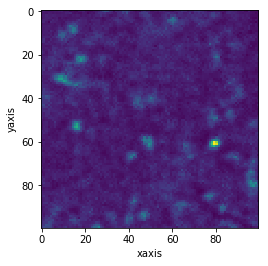

In [8]:
master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(path+inputDataFolder,master_uniqueFilenameString)
slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(path+inputDataFolder,slave_uniqueFilenameString)

print(master_filesOfInterest)
latticeMovieFrame = skimage.external.tifffile.imread(path+inputDataFolder+'/'+master_filesOfInterest[5])
print(latticeMovieFrame.shape)
plt.imshow(latticeMovieFrame[50])
plt.ylabel('yaxis')
plt.xlabel('xaxis')

# Crop a volume out of the movie

In [14]:
center = np.array([50,50,50])
margin = np.array([25,25,25])

for i in range(0,movieLength):
    print(i)
    
    latticeMovieFrame = skimage.external.tifffile.imread(path+inputDataFolder+'/'+master_filesOfInterest[i])
    cropped = tiffproc.cropLatticeFrame(latticeMovieFrame,center.astype(int),margin.astype(int))
    skimage.external.tifffile.imsave(path+outputDataFolder+'/'+master_outputDataFolder+'/cropped_master_'+str(i).zfill(4)+'.tif', cropped)
    print(path+outputDataFolder+'/'+master_outputDataFolder+'/cropped_master_'+str(i).zfill(4)+'.tif')
    
    latticeMovieFrame = skimage.external.tifffile.imread(path+inputDataFolder+'/'+slave_filesOfInterest[i])
    cropped = tiffproc.cropLatticeFrame(latticeMovieFrame,center.astype(int),margin.astype(int))
    skimage.external.tifffile.imsave(path+outputDataFolder+'/'+slave_outputDataFolder+'/cropped_slave_'+str(i).zfill(4) +'.tif', cropped)
    print(path+outputDataFolder+'/'+slave_outputDataFolder+'/cropped_slave_'+str(i).zfill(4) +'.tif')
    

0
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_560/cropped_master_0000.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_488/cropped_slave_0000.tif
1
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_560/cropped_master_0001.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_488/cropped_slave_0001.tif
2
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_560/cropped_master_0002.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_488/cropped_slave_0002.tif
3
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_560/cropped_master_0003.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_488/cropped_slave_0003.tif
4
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/output_560/cropped_master_0004

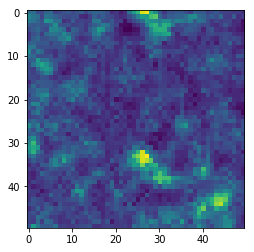

In [13]:
# plot the resulting cropped 
i=0
croppedlatticeMovieFrame = skimage.external.tifffile.imread(path+outputDataFolder+'/'+master_outputDataFolder+'/cropped_master_'+str(i).zfill(4)+'.tif')
plt.imshow(croppedlatticeMovieFrame[margin[0]])